# Machine Learning - Project 1 and 2 
## Kowshik Raj Durai Murugan - KXD180034


# Project 1:- Part A: Classification - Adult Income

Aim: To classify an adult's income based on several factors.

### Source Link: https://archive.ics.uci.edu/ml/datasets/adult


# Data Description
Attribute Information: -

1.age: continuous.

2.workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3.fnlwgt: continuous.

4.education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5.education-num: continuous.

6.marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7.occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8.relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9.race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10.sex: Female, Male.

11.capital-gain: continuous.

12.capital-loss: continuous.

13.hours-per-week: continuous.

14.native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

15.class: >50K, <=50K

Target Variable: Income

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
income_df=pd.read_csv("C:\\Users\\dkows\\OneDrive\\Desktop\\UTD\\Sem 2\\Machine Learning\\ML\\Project\\Project_P1\\adult_income.csv")

In [4]:
income_df[income_df.columns[9]]=income_df[income_df.columns[9]].astype('category')
income_df[income_df.columns[9]]

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
48837    Female
48838      Male
48839    Female
48840      Male
48841    Female
Name: gender, Length: 48842, dtype: category
Categories (2, object): [Female, Male]

In [5]:
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
income_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
income_df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Preprocessing (Dealing with missing values)

In [8]:
income_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
# Checking for duplicate rows
df=income_df.drop_duplicates()
df.shape

(48790, 15)

In [10]:
def make_missing(df,column):
    random.seed(4)
    randomlist = random.sample(range(0, 48790), 5000)
    print(len(randomlist))
    for rnd in randomlist:
        df[column][rnd] = np.nan
    print(df.isnull().sum().sort_values(ascending = False))
    return df

In [11]:
missing_columns = ['fnlwgt','educational-num', 'hours-per-week']
for missing in missing_columns:
    df = make_missing(df,missing)

5000
fnlwgt             1336
income                0
native-country        0
hours-per-week        0
capital-loss          0
capital-gain          0
gender                0
race                  0
relationship          0
occupation            0
marital-status        0
educational-num       0
education             0
workclass             0
age                   0
dtype: int64
5000
educational-num    1336
fnlwgt             1336
income                0
native-country        0
hours-per-week        0
capital-loss          0
capital-gain          0
gender                0
race                  0
relationship          0
occupation            0
marital-status        0
education             0
workclass             0
age                   0
dtype: int64
5000
hours-per-week     1336
educational-num    1336
fnlwgt             1336
income                0
native-country        0
capital-loss          0
capital-gain          0
gender                0
race                  0
relationship          0

In [12]:
# Percentage of missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / len(df)*100).sort_values(ascending = False)
missingData = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
missingData

,Total,Percent
hours-per-week,1336,2.738266
educational-num,1336,2.738266
fnlwgt,1336,2.738266
income,0,0.000000
native-country,0,0.000000
capital-loss,0,0.000000
capital-gain,0,0.000000
gender,0,0.000000
race,0,0.000000
relationship,0,0.000000


## Allocation of a new column based on a condition

In [13]:
df['income'] = np.where(df['income']=='>50K', 1, 0)

In [14]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48790.000000,4.745400e+04,47454.000000,48790.000000,48790.000000,47454.000000,48790.000000
mean,38.652798,1.896497e+05,10.076727,1080.217688,87.595573,40.427572,0.239414
std,13.708493,1.057757e+05,2.569653,7455.905921,403.209129,12.400897,0.426730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175280e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.780370e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.375460e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


## Imputing values and inserting dummy columns for computation

In [15]:
df['hours-per-week'] = np.where(df['hours-per-week']==np.nan, df['hours-per-week'].mean(),df['hours-per-week'])


In [16]:
df1=pd.get_dummies(df)

In [17]:
df1

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802.0,7.0,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814.0,9.0,0,0,50.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951.0,12.0,0,0,40.0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,44,160323.0,10.0,7688,0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497.0,10.0,0,0,30.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302.0,12.0,0,0,38.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374.0,9.0,0,0,40.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910.0,9.0,0,0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490.0,9.0,0,0,20.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Engineering and Data Visualisation

In [18]:
print('workclass',income_df.workclass.unique())
print('education',income_df.education.unique())
print('marital-status',income_df['marital-status'].unique())
print('occupation',income_df.occupation.unique())
print('relationship',income_df.relationship.unique())
print('race',income_df.race.unique())
print('gender',income_df.gender.unique())
print('native-country',income_df['native-country'].unique())
print('income',income_df.income.unique())

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender [Male, Female]
Categories (2, object): [Male, Female]
native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'

In [19]:
# Making the age variable discretized 
income_df['age_bin'] = pd.cut(income_df['age'], 20)

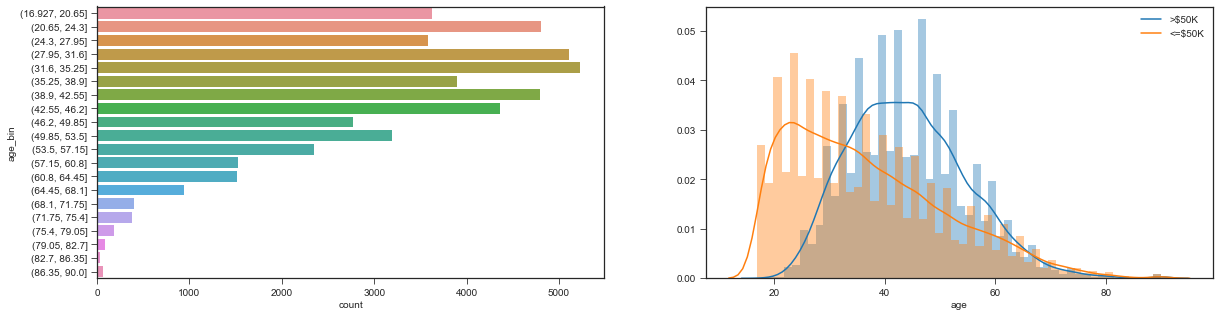

In [20]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=income_df)
plt.subplot(1, 2, 2)
sns.distplot(income_df[income_df['income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(income_df[income_df['income'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

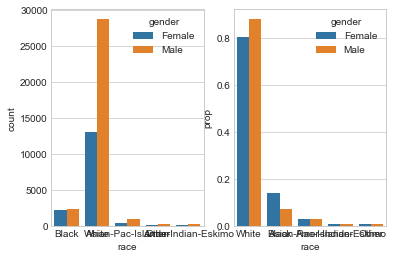

In [21]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=income_df, ax=axes[0])

prop_df = (income_df[x]
           .groupby(income_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])


In [22]:
# Using the Pandas Cut function to bin the data in equally sized buckets
income_df['hours-per-week_bin'] = pd.cut(income_df['hours-per-week'], 10)
income_df['hours-per-week'] = income_df['hours-per-week']

(0, 0.25961704827267995)

(20, 60)

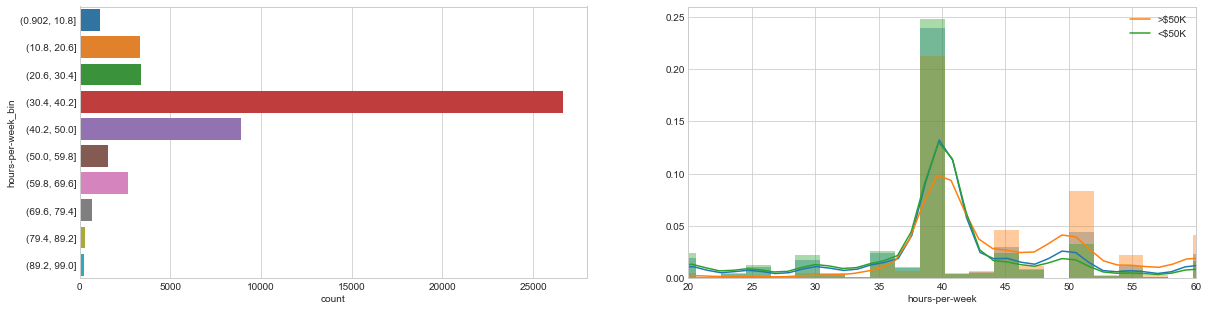

In [23]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=income_df);
plt.subplot(1, 2, 2)
sns.distplot(income_df['hours-per-week']);
sns.distplot(income_df[income_df['income'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(income_df[income_df['income'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

### Creating a cross feature: Age + Hours of work

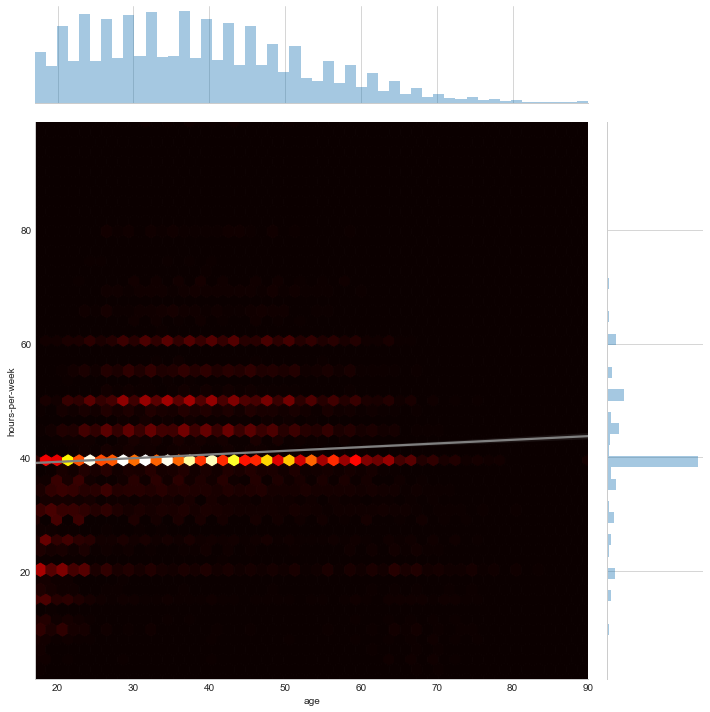

In [24]:
g = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = income_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)
sns.regplot(income_df.age, income_df['hours-per-week'], ax=g.ax_joint, scatter=False, color='grey')

## Explanatory Data Analysis

### Correlation Heatmap

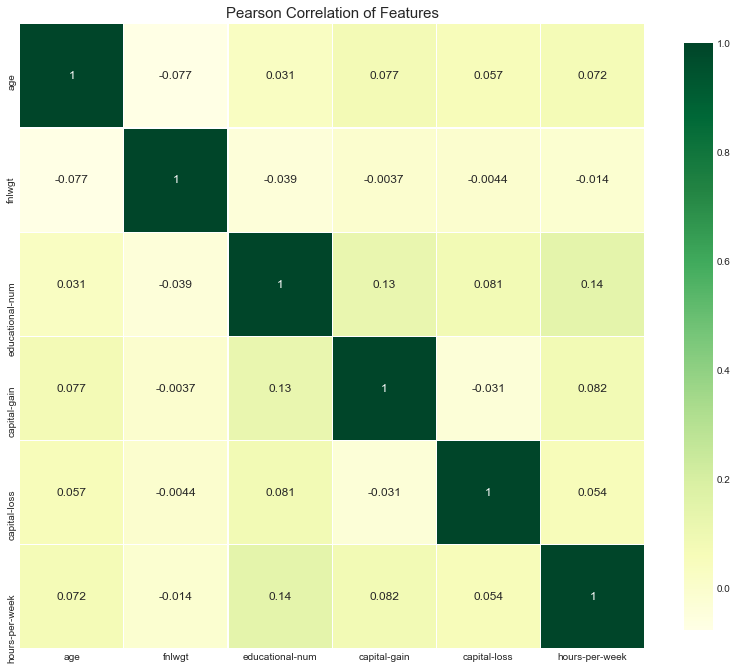

In [25]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(income_df)


## Feature Encoding

In [26]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [27]:
income_df = income_df.apply(LabelEncoder().fit_transform)
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin,hours-per-week_bin
0,8,4,19329,1,6,4,7,3,2,1,0,0,39,39,0,2,3
1,21,4,4212,11,8,2,5,0,4,1,0,0,49,39,0,5,4
2,11,2,25340,7,11,2,11,0,4,1,0,0,39,39,1,3,3
3,27,4,11201,15,9,2,7,0,2,1,98,0,39,39,1,7,3
4,1,0,5411,15,9,4,0,3,4,0,0,0,29,39,0,0,2


In [28]:
# Crossing Numerical Features
income_df['age-hours'] = income_df['age']*income_df['hours-per-week']
income_df['age-hours_bin'] = pd.cut(income_df['age-hours'], 10)

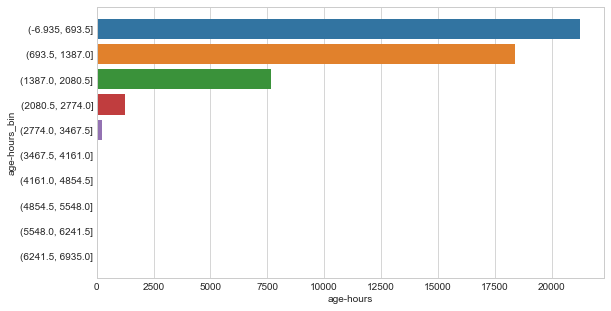

In [29]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=income_df);
sns.distplot(income_df[income_df['income'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(income_df[income_df['income'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})

# Classification Task

In [30]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

In [31]:
drop_elements = ['education', 'native-country', 'income', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = income_df["income"]
X = income_df.drop(drop_elements, axis=1)
X.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,age-hours
0,8,4,19329,6,4,7,3,2,1,0,0,39,312
1,21,4,4212,8,2,5,0,4,1,0,0,49,1029
2,11,2,25340,11,2,11,0,4,1,0,0,39,429
3,27,4,11201,9,2,7,0,2,1,98,0,39,1053
4,1,0,5411,9,4,0,3,4,0,0,0,29,29


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
# Scaling the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
#Random sampling to select 10% rows to reduce the computation power
np.random.seed(10)
df1 = income_df.sample(frac =.1)
df1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bin,hours-per-week_bin,age-hours,age-hours_bin
28113,17,4,25424,11,8,5,6,4,4,0,0,0,39,39,0,4,3,663,"(-6.935, 693.5]"
40486,52,4,8269,9,12,6,4,1,4,0,33,0,14,39,0,14,1,728,"(693.5, 1387.0]"
45549,9,2,3187,15,9,2,11,0,4,1,0,0,54,39,1,2,5,486,"(-6.935, 693.5]"
3173,40,2,18018,12,13,2,4,0,4,1,0,0,39,39,1,10,3,1560,"(1387.0, 2080.5]"
46828,1,4,8921,1,6,4,8,3,4,0,0,0,14,39,0,0,1,14,"(-6.935, 693.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16475,24,1,8299,9,12,2,13,0,4,1,0,0,23,39,0,6,2,552,"(-6.935, 693.5]"
11310,9,4,17824,11,8,2,3,0,4,1,0,0,41,39,1,2,4,369,"(-6.935, 693.5]"
13576,19,4,19133,15,9,2,3,0,4,1,0,0,39,39,1,5,3,741,"(693.5, 1387.0]"
7122,26,2,18030,8,10,0,1,1,2,0,0,0,39,39,0,7,3,1014,"(693.5, 1387.0]"


# 1) KNN Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a new knn model
knn = KNeighborsClassifier()

# n_neighbors to test
k = np.arange(10)+1
param_knn= [{'n_neighbors':k}]

#using gridsearch to test all values for n-neighbors
knn_clf = GridSearchCV(knn, param_knn, cv=5)

#fitting the model
knn_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
#Best n_neighbhor value
knn_clf.best_params_

#Validation score
knn_clf.best_score_

{'n_neighbors': 10}

0.8447520297983786

In [37]:
KNN_best = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

print('Accuracy of KNN classifier on training set: {:.4f}'
     .format(KNN_best.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.4f}'
     .format(KNN_best.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.8709
Accuracy of KNN classifier on test set: 0.8461


In [38]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(knn,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.84273832 0.84158669 0.83608445 0.83747121 0.83184029]
Average cross-validation scroe: 0.8379


In [39]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

KNN_predicted = KNN_best.predict(X_test)
cm = confusion_matrix(y_test, KNN_predicted)
cm

array([[6985,  489],
       [1014, 1281]], dtype=int64)

In [40]:
# Checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,KNN_predicted)*100

84.61459719520934

# 2) Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1', 'l2'] }

In [42]:
# Uisng Grid search to find the best parameters and fitting the model
logit_clf = GridSearchCV(logit, param_grid,cv=5)
logit_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
logit_clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [44]:
LR = LogisticRegression(penalty = 'l2', C= 1)
LR.fit(X_train,y_train)

print('Accuracy of logistic regression on training set: {:.4f}'
     .format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.4f}'
     .format(logit_clf.score(X_test, y_test)))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of logistic regression on training set: 0.8241
Accuracy of logistic regression on test set: 0.8254


In [45]:
#Cross Validation
cvscore = cross_val_score(LR,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation scroe: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.8275112  0.82815099 0.82175304 0.82364986 0.81904274]
Average cross-validation scroe: 0.8240


In [46]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[7021,  453],
       [1253, 1042]], dtype=int64)

In [47]:
#Accuracy
accuracy_score(y_test,y_pred)

0.8253659535264612

# 3) Linear Support Vector Machine

In [48]:
from sklearn.svm import SVC
LinSVC = SVC(kernel='linear',max_iter=100000)
LinSVM_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [49]:
# Uisng Grid search to find the best parameters and fitting the model
LinSVC_clf = GridSearchCV(LinSVC, LinSVM_params,cv=5)
LinSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=100000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
LinSVC_clf.best_params_

{'C': 0.1}

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
from sklearn.svm import SVC, LinearSVC

clf = LinearSVC (C=1)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
print('Accuracy of linear SVM on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of linear SVM on test set: {:.4f}'
     .format(LinSVC_clf.score(X_test, y_test)))

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

0.8227932331789215

Accuracy of linear SVM on training set: 0.8228
Accuracy of linear SVM on test set: 0.8103


In [53]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='linear',C=1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.8112604  0.81138836 0.81164427 0.80829281 0.80944459]
Average cross-validation score: 0.8104


In [54]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[7104,  370],
       [1350,  945]], dtype=int64)

In [55]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

82.39328488074521

# 4) a) Kernel SVM (RBF and Linear)

In [56]:
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000)
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[1,0.1,0.001], 'kernel':['rbf','linear']}

In [57]:
# Uisng Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=10000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
KernelSVC_clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [59]:
kernel_clf= SVC(kernel='linear', C= 1, gamma= 1)
kernel_clf.fit(X_train,y_train)
kernel_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test, y_test)))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.8102781972205871

Accuracy of Kernelized SVM on training set: 0.8103
Accuracy of Kernelized SVM on test set: 0.8522


In [60]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='linear',C=1,gamma=1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.8112604  0.81138836 0.81164427 0.80829281 0.80944459]
Average cross-validation score: 0.8104


In [61]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = kernel_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[7246,  228],
       [1624,  671]], dtype=int64)

In [62]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

81.04207185996519

# 4) b) Kernel SVM (Poly)

In [63]:
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000)
kernelSVC_params = {'C':[0.01, 0.1, 1, 10],'gamma':[0.01,0.1,1], 'kernel':['poly']}

In [64]:
# Uisng Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=10000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
KernelSVC_clf.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [66]:
kernel_clf= SVC(kernel='poly', C= 0.1, gamma= 0.1)
kernel_clf.fit(X_train,y_train)
kernel_clf.score(X_train,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test, y_test)))

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.8450080618329793

Accuracy of Kernelized SVM on training set: 0.8450
Accuracy of Kernelized SVM on test set: 0.8450


In [67]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(SVC(kernel='linear',C=1,gamma=1),X_train,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.8112604  0.81138836 0.81164427 0.80829281 0.80944459]
Average cross-validation score: 0.8104


In [68]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = kernel_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[7220,  254],
       [1289, 1006]], dtype=int64)

In [69]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100  

84.20513870406387

# 5) Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [5, 10, 20, 50, 100]}
# Uisng Grid search to find the best parameters and fitting the model
grid_search = GridSearchCV(dt_clf, param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 20, 50, 100]},
             pre_

In [71]:
grid_search.best_params_

{'max_depth': 10}

In [72]:
grid_search.best_score_

0.8523530169859338

In [73]:
dt_clf_best = DecisionTreeClassifier(max_depth = 5)
dt_clf_best.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(dt_clf_best.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(dt_clf_best.score(X_test, y_test)))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Train score: 0.85
Test score: 0.85


In [74]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf_best,X_train,y_train, cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

Cross validation scores: [0.84926424 0.84939219 0.84504159 0.84514973 0.84105452]
Average cross-validation scroe: 0.85


In [75]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
dt_predicted = dt_clf_best.predict(X_test)
cm = confusion_matrix(y_test, dt_predicted)
cm

array([[7141,  333],
       [1175, 1120]], dtype=int64)

In [76]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,dt_predicted)*100

84.56341488381615

### The best model for the dataset is the KNN Model as it exhibits the highest accuracy score of 84.61.

# Project 2:- Part A: Classification - Adult Income

# 1) Voting Classifier

In [77]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## a) Voting Classifier - Hard

In [78]:
log_clf = LogisticRegression()
svc_clf = SVC(kernel = 'linear', gamma = 1, C=1, probability=True)
dt_clf = DecisionTreeClassifier(max_depth= 5)

In [79]:
log_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
voting = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf), ('dt', dt_clf)], voting = 'hard')

In [81]:
print('log_clf: ', log_clf.score(X_train, y_train))
print('svc_clf: ', svc_clf.score(X_train, y_train))
print('dt_clf: ', dt_clf.score(X_train, y_train))

log_clf:  0.8241240754485194
svc_clf:  0.8102781972205871
dt_clf:  0.8479000844572979


In [82]:
voting.fit(X_train, y_train)
print('vot_clf Train: ', voting.score(X_train, y_train))
print('vot_clf Test: ', voting.score(X_test, y_test))

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  dec...
                              DecisionTreeClassifier(ccp_alpha=0.0,
       

vot_clf Train:  0.8337982750236737
vot_clf Test:  0.8321220186303614


## b) Voting Classifier - Soft

In [83]:
soft_voting = VotingClassifier(estimators=[('lr', log_clf), ('svc', svc_clf), ('dt', dt_clf)], voting = 'soft')

In [84]:
soft_voting.fit(X_train, y_train)
print('vot_clf Train: ', soft_voting.score(X_train, y_train))
print('vot_clf Test: ', soft_voting.score(X_test, y_test))

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  dec...
                              DecisionTreeClassifier(ccp_alpha=0.0,
       

vot_clf Train:  0.8388913060169426
vot_clf Test:  0.8382638959975433


In [85]:
voting_classifier_comparision=pd.DataFrame(columns=['Hard Voting',' Soft Voting'],
                                   index=['Train','Test'])

In [86]:
voting_classifier_comparision.loc['Train'] = [voting.score(X_train, y_train),soft_voting.score(X_train, y_train)]
voting_classifier_comparision.loc['Test'] = [voting.score(X_test, y_test),soft_voting.score(X_train, y_train)]
voting_classifier_comparision

,Hard Voting,Soft Voting
Train,0.833798,0.838891
Test,0.832122,0.838891


### From the above comparison, we observe that soft voting is better than hard voting.

# 2) Bagging

## Models used are decision tree and logistic regression

In [87]:
from sklearn.ensemble import BaggingClassifier

dt_clf = DecisionTreeClassifier(random_state = 0, max_depth= 5)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, bootstrap= True, random_state = 0)

In [88]:
bag_clf.fit(X_train, y_train)
bag_clf.score(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,
      

0.8492309267268958

In [89]:
bag_clf.score(X_test, y_test)

0.8465554304432388

In [90]:
log_clf.fit(X_train, y_train)
bag1_clf = BaggingClassifier(log_clf, n_estimators=500, bootstrap= True, max_features=10, random_state = 0)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
bag1_clf.fit(X_train, y_train)
bag1_clf.score(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=10,
                  max_samples=1.0, n_estimators=500, n_jobs=None,
                  oob_score=False, random_state=0, ve

0.8218206945972922

In [92]:
bag1_clf.score(X_test, y_test)

0.8239328488074521

In [93]:
bagging_classifier_comparision=pd.DataFrame(columns=['Decision Tree',' Logisitc Regression'],
                                   index=['Train','Test'])

In [94]:
bagging_classifier_comparision.loc['Train'] = [bag_clf.score(X_train, y_train),bag1_clf.score(X_train, y_train)]
bagging_classifier_comparision.loc['Test'] = [bag_clf.score(X_test, y_test),bag1_clf.score(X_test, y_test)]
bagging_classifier_comparision

,Decision Tree,Logisitc Regression
Train,0.849231,0.821821
Test,0.846555,0.823933


# 3) Pasting

### Model 1: Decision Tree

In [95]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400]}

grid_search = GridSearchCV(BaggingClassifier(random_state = 0), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=0,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_samples': [50, 100, 200, 400],
                         'n_estimators': [50, 100, 200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'max_samples': 400, 'n_estimators': 500}
Best cross-validation score: 0.85


In [96]:
# Grid search to find the best parameter for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, r

Best parameters: {'max_depth': 8}
Best cross-validation score: 0.85


In [97]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=200, max_samples=200, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Score after Bagging on Decision Tree Classifier on Train Set: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Score after Bagging on Decision Tree Classifier on Test Set: {:.2f}'.format(bag_clf.score(X_test, y_test)))


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,
      

Score after Bagging on Decision Tree Classifier on Train Set: 0.84
Score after Bagging on Decision Tree Classifier on Test Set: 0.84


In [98]:
from  sklearn.metrics import accuracy_score
print("Accuracy  of the model : ", accuracy_score(y_test, y_pred).round(4))

Accuracy  of the model :  0.8398


In [99]:
from sklearn.metrics import confusion_matrix
pred_test = bag_clf.predict(X_test)
pred_train = bag_clf.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[7164  310]
 [1255 1040]]
Confusion matrix for train:
[[28406  1275]
 [ 4919  4473]]


In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_test, target_names=["popular", "not popular"]))

              precision    recall  f1-score   support

     popular       0.85      0.96      0.90      7474
 not popular       0.77      0.45      0.57      2295

    accuracy                           0.84      9769
   macro avg       0.81      0.71      0.74      9769
weighted avg       0.83      0.84      0.82      9769



### Model 2: Random Forest

In [101]:
# Grid search to find the best parameter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': [50,100,200,500],
              'max_depth': np.arange(1, 10)}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                  

Best parameters: {'max_depth': 9, 'n_estimators': 50}
Best cross-validation score: 0.86


In [102]:
rnd_clf = RandomForestClassifier(n_estimators=200, max_depth = 8,  bootstrap=False, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print('Score after Bagging on Random Forest Classifier Classifier on Train Set: {:.2f}'.format(rnd_clf.score(X_train, y_train)))
print('Score after Bagging on Random Forest Classifier on Test Set: {:.2f}'.format(rnd_clf.score(X_test, y_test)))

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Score after Bagging on Random Forest Classifier Classifier on Train Set: 0.86
Score after Bagging on Random Forest Classifier on Test Set: 0.86


In [103]:
from  sklearn.metrics import accuracy_score
print("Accuracy of the model : ", accuracy_score(y_test, y_pred).round(4))

Accuracy of the model :  0.8398


In [104]:
from sklearn.metrics import confusion_matrix
pred_test = rnd_clf.predict(X_test)
pred_train = rnd_clf.predict(X_train)
confusion_test = confusion_matrix(y_test, pred_test)
confusion_train = confusion_matrix(y_train, pred_train)
print("Confusion matrix for test:\n{}".format(confusion_test))
print("Confusion matrix for train:\n{}".format(confusion_train))

Confusion matrix for test:
[[7200  274]
 [1127 1168]]
Confusion matrix for train:
[[28580  1101]
 [ 4342  5050]]


In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_test, target_names=["popular", "not popular "]))

              precision    recall  f1-score   support

     popular       0.86      0.96      0.91      7474
not popular        0.81      0.51      0.63      2295

    accuracy                           0.86      9769
   macro avg       0.84      0.74      0.77      9769
weighted avg       0.85      0.86      0.84      9769



In [106]:
pasting_comparision=pd.DataFrame(columns=['Decision Tree','Random Forest'],
                                   index=['Train','Test'])

In [107]:
pasting_comparision.loc['Train'] = [bag_clf.score(X_train, y_train),rnd_clf.score(X_train, y_train)]
pasting_comparision.loc['Test'] = [bag_clf.score(X_test, y_test),rnd_clf.score(X_test, y_test)]
pasting_comparision

,Decision Tree,Random Forest
Train,0.841476,0.860697
Test,0.839799,0.856587


# 4) AdaBoosting

## Models used are decision tree and logistic regression

In [108]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5), n_estimators= 200, learning_rate= 0.05)

In [109]:
ada_clf.fit(X_train, y_train)
ada_clf.score(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

0.8891050085736953

In [110]:
ada_clf.score(X_test, y_test)

0.8742962432183438

In [111]:
ada1_clf= AdaBoostClassifier(LogisticRegression(),random_state=0)

In [112]:
ada1_clf.fit(X_train,y_train)
ada1_clf.score(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1.0, n_estimators=50, random_state=0)

0.8205410385688326

In [113]:
ada1_clf.score(X_test,y_test)

0.8218855563517249

In [114]:
adaboosting_comparision=pd.DataFrame(columns=['Decision Tree','Logisitc Regression'],
                                   index=['Train','Test'])

In [115]:
adaboosting_comparision.loc['Train'] = [ada_clf.score(X_train, y_train),ada1_clf.score(X_train,y_train)]
adaboosting_comparision.loc['Test'] = [ada_clf.score(X_test, y_test),ada1_clf.score(X_test, y_test)]
adaboosting_comparision

,Decision Tree,Logisitc Regression
Train,0.889105,0.820541
Test,0.874296,0.821886


# 5) Gradient Boosting

In [116]:
#Fitting Gradient Boosting to Training set
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(max_depth= 1, n_estimators= 50, learning_rate= 0.1, random_state= 0)
clf.fit(X_train, y_train)

#Predicting the Test set results
Y_pred = clf.predict(X_test)

#Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

array([[7164,  310],
       [1255, 1040]], dtype=int64)

In [117]:
#Accuracy
accuracy_score(y_test,Y_pred)*100

84.33821271368615

In [118]:
clf.score(X_train, y_train) 

0.841476211194431

In [119]:
clf.score(X_test, y_test) 

0.8433821271368614

# 6) Principal Component Analysis

In [120]:
from sklearn.decomposition import PCA

pca_classification = PCA(n_components = .95)
X_train_class = pca_classification.fit_transform(X_train)
X_test_class = pca_classification.transform(X_test)

In [121]:
# number of components after PCA
pca_classification.n_components_

11

## a) KNN Classifier after PCA

In [122]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': range(1,10)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Grid Search Score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

Best parameters: {'n_neighbors': 8}
Best Grid Search Score: 0.84


Text(0.5, 1.0, 'Number of Neighbors Vs. Mean Train/Validation Accuracy')

Text(0.5, 0, 'Number of Neighbors in KNN regressor')

Text(0, 0.5, 'Accuracy')

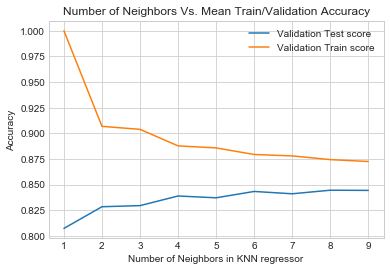

In [123]:
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'],label='Validation Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],label='Validation Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors in KNN regressor')
plt.ylabel('Accuracy')
plt.legend()

In [124]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_class, y_train)
y_pred_knn = knn.predict(X_test_class)
knn_train_Score = round(knn.score(X_train_class,y_train),4)
knn_test_Score = round(knn.score(X_test_class,y_test),4)
print('Train score on best parameters',knn_train_Score)
print('Test score on best parameters',knn_test_Score)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

Train score on best parameters 0.8747
Test score on best parameters 0.8448


In [125]:
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(knn, X_train, y_train, cv=10)
pd.DataFrame({'Cross-validation train score': knn_scores})

,Cross-validation train score
0,0.848004
1,0.848260
2,0.853378
3,0.843870
4,0.836959
5,0.841055
6,0.844382
7,0.844126
8,0.846685
9,0.843102


In [126]:
print("Average cross-validation score: {:.2f}".format(knn_scores.mean()))

Average cross-validation score: 0.84


In [127]:
print(classification_report(y_pred = y_pred_knn, y_true = y_test))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7474
           1       0.72      0.55      0.63      2295

    accuracy                           0.84      9769
   macro avg       0.80      0.74      0.76      9769
weighted avg       0.84      0.84      0.84      9769



In [128]:
print(confusion_matrix(y_pred = y_pred_knn, y_true = y_test))

[[6989  485]
 [1031 1264]]


In [129]:
pca_result_dataframe = pd.DataFrame(columns=('Model_Name', 'Parameters', 'Train_Score', 'Test_Score', ))
pca_result_dataframe.loc[len(pca_result_dataframe)]=['KNN Regressor',grid_search.best_params_,knn_train_Score,knn_test_Score]                                      
pca_result_dataframe


,Model_Name,Parameters,Train_Score,Test_Score
0,KNN Regressor,{'n_neighbors': 8},0.8747,0.8448


## b) Logistic Regression after PCA

In [130]:
from sklearn.linear_model import LogisticRegression
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid_svm, cv=5, return_train_score=True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best grid search score: {:.6f}".format(grid_search.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'C': 1, 'penalty': 'l2'}
Best grid search score: 0.824508


In [131]:
log_reg = LogisticRegression(C=1,penalty='l2').fit(X_train_class, y_train)
log_reg_train_Score = round(log_reg.score(X_train_class,y_train),4)
log_reg_test_Score = round(log_reg.score(X_test_class,y_test),4)
y_pred = log_reg.predict(X_test_class)
print('Train score on best parameters for Logistic Regression model',log_reg_train_Score)
print('Test score on best parameters for Logistic Regression model',log_reg_test_Score)

Train score on best parameters for Logistic Regression model 0.8244
Test score on best parameters for Logistic Regression model 0.8257


In [132]:
cross_scores = cross_val_score(log_reg, X_train_class,y_train, cv=5)

pd.DataFrame({'Cross-validation scores' : cross_scores})

,Cross-validation scores
0,0.826743
1,0.828151
2,0.823800
3,0.824930
4,0.818915


In [133]:
print("Average cross-validation score: {:.2f}".format(cross_scores.mean()))

Average cross-validation score: 0.82


In [134]:
print(classification_report(y_pred = y_pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7474
           1       0.70      0.45      0.55      2295

    accuracy                           0.83      9769
   macro avg       0.77      0.70      0.72      9769
weighted avg       0.81      0.83      0.81      9769



In [135]:
print(confusion_matrix(y_pred=y_pred,y_true=y_test))

[[7022  452]
 [1251 1044]]


In [136]:
pca_result_dataframe.loc[len(pca_result_dataframe)]=['Logistic Regression',grid_search.best_params_,log_reg_train_Score,log_reg_test_Score]                                      
pca_result_dataframe

,Model_Name,Parameters,Train_Score,Test_Score
0,KNN Regressor,{'n_neighbors': 8},0.8747,0.8448
1,Logistic Regression,"{'C': 1, 'penalty': 'l2'}",0.8244,0.8257


## c) Linear SVM after PCA

In [137]:
from sklearn.svm import SVC
LinearSVC = SVC(kernel='linear')
param_grid = { 'max_iter' : range(1,200),'C' : [ 0.01, 0.1, 1, 10, 100, 1000]}

svc_grid_search_linear = GridSearchCV(LinearSVC, param_grid, cv=10, return_train_score=True)
svc_grid_search_linear.fit(X_train_class, y_train)

print("Best parameters: {}".format(svc_grid_search_linear.best_params_))
print("Best grid search score: {:.2f}".format(svc_grid_search_linear.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': range(1, 200)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'C': 10, 'max_iter': 1}
Best grid search score: 0.76


In [138]:
from sklearn.svm import SVC, LinearSVC
lsvc = LinearSVC (C = 1 ,max_iter = 28).fit(X_train_class, y_train)
# Linear SVM
linear_svm_train =round(lsvc.score(X_train_class,y_train),4)
linear_svm_test =round(lsvc.score(X_test_class,y_test),4)
print('Train score with best parameters for Linear SVM - {}'.format(linear_svm_train))
print('Test score with best parameters for Linear SVM - {}'.format(linear_svm_test))

Train score with best parameters for Linear SVM - 0.8033
Test score with best parameters for Linear SVM - 0.804


In [139]:
cross_scores = cross_val_score(lsvc, X_train_class,y_train, cv=5)
pd.DataFrame({'Cross-validation scores' : cross_scores})

,Cross-validation scores
0,0.806654
1,0.823033
2,0.809213
3,0.813284
4,0.808933


In [140]:
print("Average cross-validation score: {:.2f}".format(cross_scores.mean()))

Average cross-validation score: 0.81


In [141]:
y_pred_linsvm = lsvc.predict(X_test_class)
print(classification_report(y_pred = y_pred_linsvm, y_true = y_test))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7474
           1       0.69      0.30      0.42      2295

    accuracy                           0.80      9769
   macro avg       0.75      0.63      0.65      9769
weighted avg       0.79      0.80      0.77      9769



In [142]:
pca_result_dataframe.loc[len(pca_result_dataframe)]=['Linear SVM',svc_grid_search_linear.best_params_,linear_svm_train,linear_svm_test]                                      
pca_result_dataframe

,Model_Name,Parameters,Train_Score,Test_Score
0,KNN Regressor,{'n_neighbors': 8},0.8747,0.8448
1,Logistic Regression,"{'C': 1, 'penalty': 'l2'}",0.8244,0.8257
2,Linear SVM,"{'C': 10, 'max_iter': 1}",0.8033,0.8040


## d) Kernel SVM (RBF and Linear) after PCA

In [143]:
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000)
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10],'gamma':[1,0.1,0.001], 'kernel':['rbf','linear']}

In [144]:
# Uisng Grid search to find the best parameters and fitting the model
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train_class,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=10000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [145]:
KernelSVC_clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [146]:
kernel_clf= SVC(kernel='rbf', C= 0.1, gamma= 0.1)
kernel_clf.fit(X_train_class,y_train)
kernel_clf.score(X_train_class,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train_class, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test_class, y_test)))

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.8477977119750211

Accuracy of Kernelized SVM on training set: 0.8478
Accuracy of Kernelized SVM on test set: 0.8504


In [147]:
#Cross Validation
cvscore = cross_val_score(SVC(kernel='rbf',C=0.1,gamma=0.1),X_train_class,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.84516955 0.84760077 0.84670505 0.84412593 0.83900691]
Average cross-validation score: 0.8445


In [148]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = kernel_clf.predict(X_test_class)
cm = confusion_matrix(y_test, y_pred)
cm

array([[7177,  297],
       [1215, 1080]], dtype=int64)

In [149]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

84.52246903470161

In [150]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      8392
           1       0.47      0.78      0.59      1377

    accuracy                           0.85      9769
   macro avg       0.72      0.82      0.75      9769
weighted avg       0.89      0.85      0.86      9769



In [151]:
pca_result_dataframe.loc[len(pca_result_dataframe)]=['Kernelised SVC',KernelSVC_clf.best_params_,kernel_clf.score(X_train_class, y_train),KernelSVC_clf.score(X_test_class, y_test)]                                      
pca_result_dataframe

,Model_Name,Parameters,Train_Score,Test_Score
0,KNN Regressor,{'n_neighbors': 8},0.874700,0.844800
1,Logistic Regression,"{'C': 1, 'penalty': 'l2'}",0.824400,0.825700
2,Linear SVM,"{'C': 10, 'max_iter': 1}",0.803300,0.804000
3,Kernelised SVC,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.847798,0.850445


## e) Kernel SVM (Poly) after PCA

In [152]:
from sklearn.svm import SVC 
KernelSVC = SVC(max_iter=10000)
kernelSVC_params = {'C':[0.01, 0.1, 1, 10],'gamma':[0.01,0.1,1], 'kernel':['poly']}

In [153]:
# Uisng Grid search to find the best parameters and fitting the model
from sklearn.model_selection import GridSearchCV
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train_class,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=10000,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [154]:
KernelSVC_clf.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [155]:
kernel_clf= SVC(kernel='poly', C= 0.1, gamma= 0.1)
kernel_clf.fit(X_train_class,y_train)
kernel_clf.score(X_train_class,y_train)
print('Accuracy of Kernelized SVM on training set: {:.4f}'
     .format(kernel_clf.score(X_train_class, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.4f}'
     .format(KernelSVC_clf.score(X_test_class, y_test)))

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.8379699536764518

Accuracy of Kernelized SVM on training set: 0.8380
Accuracy of Kernelized SVM on test set: 0.8403


In [156]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cvscore = cross_val_score(SVC(kernel='linear',C=1,gamma=1),X_train_class,y_train, cv=5)
print("Cross validation scores: {}".format(cvscore))
print("Average cross-validation score: {:.4f}".format(cvscore.mean()))

Cross validation scores: [0.81100448 0.81049264 0.81190019 0.80842078 0.80816483]
Average cross-validation score: 0.8100


In [157]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred = kernel_clf.predict(X_test_class)
cm = confusion_matrix(y_test, y_pred)
cm

array([[7259,  215],
       [1371,  924]], dtype=int64)

In [158]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100  

83.7649708260825

In [159]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      8630
           1       0.40      0.81      0.54      1139

    accuracy                           0.84      9769
   macro avg       0.69      0.83      0.72      9769
weighted avg       0.90      0.84      0.86      9769



In [160]:
pca_result_dataframe.loc[len(pca_result_dataframe)]=['Kernelised SVC poly',KernelSVC_clf.best_params_,kernel_clf.score(X_train_class, y_train),KernelSVC_clf.score(X_test_class, y_test)]                                      
pca_result_dataframe

,Model_Name,Parameters,Train_Score,Test_Score
0,KNN Regressor,{'n_neighbors': 8},0.874700,0.844800
1,Logistic Regression,"{'C': 1, 'penalty': 'l2'}",0.824400,0.825700
2,Linear SVM,"{'C': 10, 'max_iter': 1}",0.803300,0.804000
3,Kernelised SVC,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.847798,0.850445
4,Kernelised SVC poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.837970,0.840311


## f) Decision Tree after PCA

In [161]:
param_grid = {'max_depth' : range(1,20), 'min_samples_leaf' : range(2,50)}
dtree_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, return_train_score=True)
dtree_grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(dtree_grid_search.best_params_))
print("Best grid search score: {:.2f}".format(dtree_grid_search.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 20),
                         

Best parameters: {'max_depth': 11, 'min_samples_leaf': 41}
Best grid search score: 0.84


In [162]:
dtree = DecisionTreeClassifier(max_depth=5,min_samples_leaf = 17,random_state=7)
dtree.fit(X_train_class, y_train)
dtree_train_best_score = round(dtree.score(X_train_class, y_train),4)
dtree_test_best_score = round(dtree.score(X_test_class, y_test),4)
y_pred_dtree = dtree.predict(X_test_class)
print("Accuracy on training set: {:.4f}".format(dtree_train_best_score))
print("Accuracy on test set: {:.4f}".format(dtree_test_best_score))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

Accuracy on training set: 0.8329
Accuracy on test set: 0.8318


In [163]:
print(classification_report(y_pred = y_pred_dtree, y_true = y_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7474
           1       0.74      0.43      0.55      2295

    accuracy                           0.83      9769
   macro avg       0.80      0.69      0.72      9769
weighted avg       0.82      0.83      0.81      9769



In [164]:
print(confusion_matrix(y_pred = y_pred_dtree, y_true = y_test))

[[7133  341]
 [1302  993]]


In [165]:
cross_scores = cross_val_score(dtree, X_train_class,y_train, cv=5)
pd.DataFrame({'Cross-validation scores' : cross_scores})

,Cross-validation scores
0,0.829303
1,0.833525
2,0.833013
3,0.828769
4,0.821730


In [166]:
print("Average cross-validation score: {:.2f}".format(cross_scores.mean()))

Average cross-validation score: 0.83


In [167]:
pca_result_dataframe.loc[len(pca_result_dataframe)]=['Decision Tree',dtree_grid_search.best_params_,dtree_train_best_score,dtree_test_best_score]
pca_result_dataframe

,Model_Name,Parameters,Train_Score,Test_Score
0,KNN Regressor,{'n_neighbors': 8},0.874700,0.844800
1,Logistic Regression,"{'C': 1, 'penalty': 'l2'}",0.824400,0.825700
2,Linear SVM,"{'C': 10, 'max_iter': 1}",0.803300,0.804000
3,Kernelised SVC,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.847798,0.850445
4,Kernelised SVC poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.837970,0.840311
5,Decision Tree,"{'max_depth': 11, 'min_samples_leaf': 41}",0.832900,0.831800


# Project 1 Results


| index | Model Name | Parameters | Train_Score | Test_Score |   
| --- | --- | --- | --- | --- |
| 0 | KNN Regressor | {'n_neighbors': 10} | 0.8709 | 0.8461 |
| 1 | Logistic Regressor | {'C': 0.1, 'penalty': 'l2'}  | 0.8241 | 0.8254 |
| 2 | Linear SVM | {'C': 0.1}  | 0.8228 | 0.8103 |
| 3 | Kernel SVM (RBF & Linear) | {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} | 0.8103 | 0.8522 |
| 4 | Kernel SVM (Poly) | {'C': 1, 'gamma': 0.1, 'kernel': 'poly'} | 0.8450 | 0.8478 |
| 5 | Decision Tree | {'max_depth': 10} | 0.85 | 0.85 |


# Project 2 Results (After PCA)


| index | Model Name | Parameters | Train_Score | Test_Score |    
| --- | --- | --- | --- | --- |
| 0 | KNN Regressor | {'n_neighbors': 8} | 0.8747 | 0.8448 |
| 1 | Logistic Regressor | {'C': 1, 'penalty': 'l2'}  | 0.8244 | 0.8257 |
| 2 | Linear SVM | {'C': 10, 'max_iter': 1}  | 0.8033 | 0.8040 |
| 3 | Kernel SVM (RBF & Linear) | {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} | 0.8478 | 0.8503 |
| 4 | Kernel SVM (Poly) | {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'} | 0.8379 | 0.8403 |
| 5 | Decision Tree | {'max_depth': 11, 'min_samples_leaf': 41} | 0.8329 | 0.8318 |

## PCA should be used as it decreases the computational complexity. After comparing the results of before and after applying PCA, we see that there isn't much difference in the results but the number of dimensions have decreased from 23 to 11, reducing the computational power.


# Deep Learning Model: Neural Networks

In [236]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [237]:
# Step 1: Build the model
model1 = Sequential()
#Input leyer
model1.add(Dense(126, input_dim = 126, activation = 'relu'))
#Hidden layer
model1.add(Dense(50, activation = 'relu'))
model1.add(Dense(25, activation = 'relu'))
#Output layer
model1.add(Dense(1, kernel_initializer='normal'))

# Step 2: Build the computational graph - compile
model1.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'] )

# Step 3: Train the model
model1.fit(X_train, y_train, epochs = 30, batch_size = 50)

Epoch 1/30
1022/1022 [==============================] - 0s 245us/step - loss: 181312.2354 - mean_absolute_error: 181312.2344
Epoch 2/30
1022/1022 [==============================] - 0s 38us/step - loss: 181309.4361 - mean_absolute_error: 181309.4375
Epoch 3/30
1022/1022 [==============================] - 0s 52us/step - loss: 181297.4334 - mean_absolute_error: 181297.4062
Epoch 4/30
1022/1022 [==============================] - 0s 51us/step - loss: 181252.3180 - mean_absolute_error: 181252.2969
Epoch 5/30
1022/1022 [==============================] - 0s 58us/step - loss: 181116.7073 - mean_absolute_error: 181116.7188
Epoch 6/30
1022/1022 [==============================] - 0s 45us/step - loss: 180773.5797 - mean_absolute_error: 180773.5625
Epoch 7/30
1022/1022 [==============================] - 0s 72us/step - loss: 180033.0495 - mean_absolute_error: 180033.0312
Epoch 8/30
1022/1022 [==============================] - 0s 42us/step - loss: 178602.7066 - mean_absolute_error: 178602.7188
Epoch 9

In [238]:
seed = 10
np.random.seed(10)

In [243]:
loss_and_metrics = model1.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

438/438 [==============================] - 0s 136us/step
Test Loss 35773.207762557075
Test Accuracy 35773.2109375


# Project 1:- Part B: Regression - House Prices

Aim - To predict the sales prices of houses

### Source Link:  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# Data Description

'''MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)'''


# Importing Packages

In [173]:
import numpy as np
import pandas as pd
import seaborn as sn
import statistics
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [174]:
project=pd.read_csv('C:\\Users\\dkows\\OneDrive\\Desktop\\UTD\\Sem 2\\Machine Learning\\ML\Project\\Project_P1\\Regression_dataset.csv')
project.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [175]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Explanatory Data Analysis and Preprocessing

In [176]:
#Separation of features and labels
features = project.iloc[:, :-1]
labels = project.iloc[:,-1]

In [177]:
#Dropping unnecessary columns
max_na= 750
features = features.loc[:, (features.isnull().sum(axis=0) <= max_na)]
features.shape

(1460, 76)

In [178]:
#Separation of categorical and numerical features
columns = features.columns
columns_categorical =  features.select_dtypes(include=['object']).columns
columns_numerical =  features.select_dtypes(include=['int64','float']).columns

In [179]:
#Replacing missing values with mode and median
#Mode for the categorical features
for cat in columns_categorical : 
    features[cat]=features[cat].fillna(features.loc[:,cat].mode()[0])

#Median for the numerical features
for num in columns_numerical : 
    medi=np.nanmedian(features[num])
    features[num]=features[num].fillna(medi)
    
features.isnull().sum().any()

False

## Correlation with Target Variable

(<Figure size 1440x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2659b044248>)

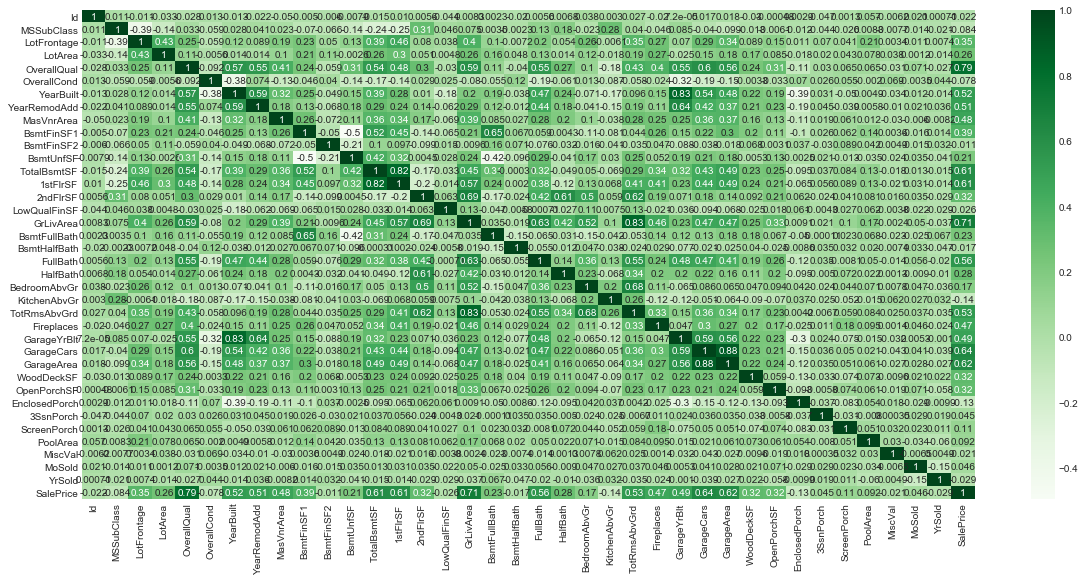

In [180]:
#Correlation and Heat map
cor=project.corr()
plt.subplots(figsize=(20,9))
sn.heatmap(cor, annot=True, cmap = 'Greens')
cor_target = abs(cor["SalePrice"])

# Selection of highly correlated features and removal of less correlated features

In [181]:
relevant_features = cor_target[cor_target<0.5]
useless=pd.DataFrame({'name':relevant_features.index})
useless_features = useless.iloc[:,-1].tolist()
for feat in useless_features:
    del features[feat]

# Boxplot for Categorical feature selection

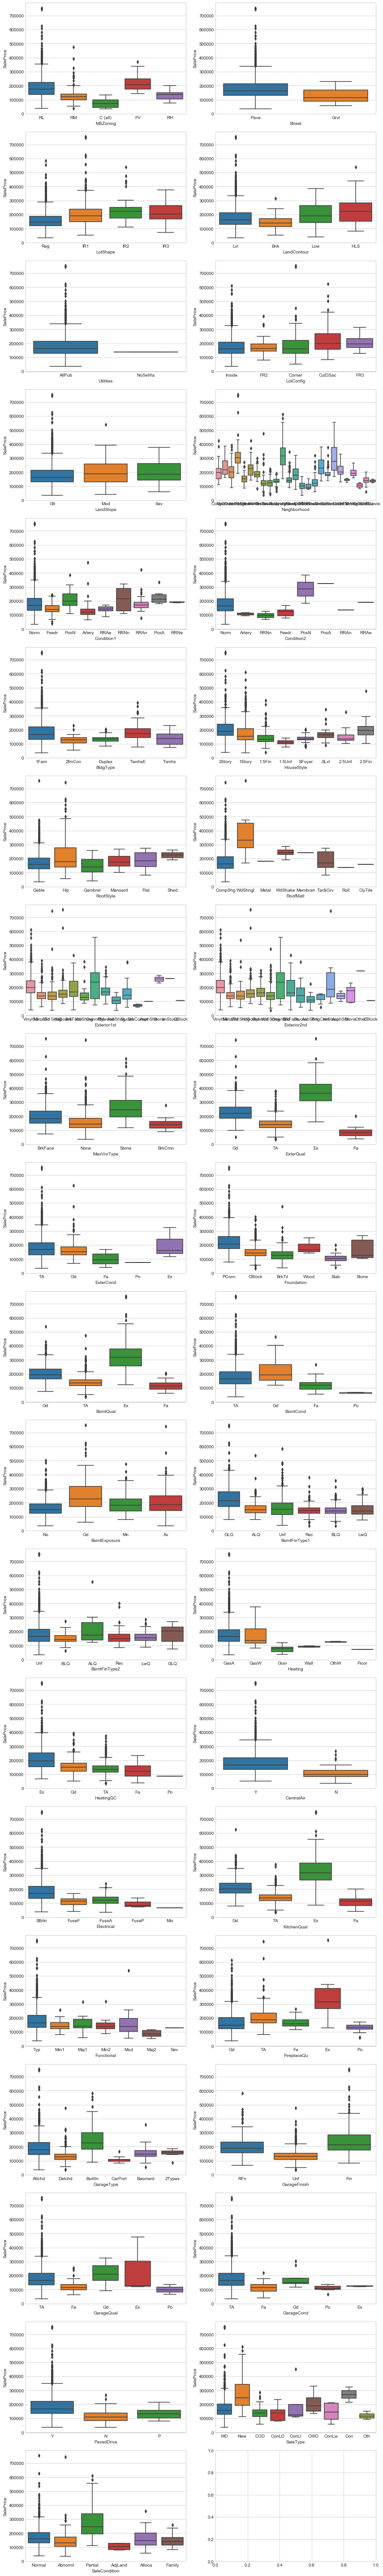

In [182]:
cat_feats = columns_categorical
rows = 20
cols = 2

fig, axs = plt.subplots(rows, cols, figsize=(cols*6,rows*4))

for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(cat_feats):
            sn.boxplot(x=cat_feats[i], y=labels, data=features, ax = axs[r][c])
    
plt.tight_layout()    
plt.show() 

# Removal of unnecessary features as per info from Boxplot

In [183]:
useless_cat_features=['Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Condition1','BldgType', 'HouseStyle', 'RoofStyle', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC','Functional', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond', 'PavedDrive']
for feats in useless_cat_features:
    del features[feats]
    
features.shape

(1460, 24)

# One hot encoding for categorical features

In [184]:
columns_to_encode =  features.select_dtypes(include=['object']).columns
for feature in columns_to_encode :
    features[feature] = features[feature].astype('category',features[feature].unique())
    features = pd.concat([features,pd.get_dummies(features[feature], prefix=feature,dummy_na=True)],axis=1).drop([feature],axis=1)
    
#Removing 'NaN' features from one hot encoding
k='_nan'
nan_list=[]
for f in columns_to_encode:
    g=f+k
    nan_list.append(g)

for t in nan_list:
    features.drop(t, axis=1, inplace=True)
    
features.shape

(1460, 126)

# Splitting the dataset into training and test dataset

In [185]:
#Train=70% Test=30%
X_train_org,X_test_org,y_train,y_test=train_test_split(features,labels,random_state=42,test_size=0.3)

## Scaling the dataset

In [186]:
#Standard Scaling is done to limit the variance of the features in the same range
sc = StandardScaler()
X_train= sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

#Scores
train_score=[]
test_score=[]
models=[]

# Regression Task

# 1) KNN Regression

In [187]:
np.random.seed(0)
    
x_range_1 = range(1,30,1)
tuned_parameters=dict(n_neighbors=x_range_1)

#Grid model
knn_reg = KNeighborsRegressor()
grid_knn=GridSearchCV(knn_reg,tuned_parameters,cv=5,iid = False)
grid_model_knn=grid_knn.fit(X_train,y_train)

print(grid_model_knn.best_params_)
print('validation score: ', grid_model_knn.best_score_)

#General Model
knn=KNeighborsRegressor(n_neighbors=6)
knn_model=knn.fit(X_train,y_train)
train_score.append(knn_model.score(X_train,y_train))
test_score.append(knn_model.score(X_test,y_test))

models.append({'Model Name' : 'KNN Regression','Best Parameters' :grid_model_knn.best_params_,
                         'Train score': round(knn_model.score(X_train,y_train),2),
                         'Test score': round(knn_model.score(X_test,y_test),2)}
                         )

{'n_neighbors': 6}
validation score:  0.6749229400331356


# 2) Linear Regression

In [188]:
#Since this model has no scaling parameter, we directly apply grid search

lreg = LinearRegression()

#Scaled train test
l_model=lreg.fit(X_train, y_train)
train_linear=round(l_model.score(X_train, y_train),2)
test_linear=round(l_model.score(X_test, y_test),2)
print(train_linear)
print(test_linear)


models.append({'Model Name' : 'Linear Regression','Best Parameters' :'-',
                         'Train score': train_linear,
                         'Test score': 0}
                         )

0.88
-2.4351544424386816e+24


# 3) Ridge Regression

In [189]:
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_ridge=grid_ridge.fit(X_train,y_train)

print(grid_model_ridge.best_params_)
print('validation score: ', grid_model_ridge.best_score_)

#General model
ridge_1=Ridge(alpha=100)
ridge_model=ridge_1.fit(X_train,y_train)
train_score.append(ridge_model.score(X_train,y_train))
test_score.append(ridge_model.score(X_test,y_test))

models.append({'Model Name' : 'Ridge Regression','Best Parameters' :grid_model_ridge.best_params_ ,
                         'Train score': round(ridge_model.score(X_train,y_train),2),
                         'Test score': round(ridge_model.score(X_test,y_test),2)}
                         )

{'alpha': 100}
validation score:  0.7835121836031864


# 4) Lasso Regression

In [190]:
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso=grid_lasso.fit(X_train,y_train)

print(grid_model_lasso.best_params_)
print('validation score: ', grid_model_lasso.best_score_)

#General model
lasso_1=Lasso(alpha=100, tol=0.1)
lasso_model=lasso_1.fit(X_train,y_train)
train_score.append(lasso_model.score(X_train,y_train))
test_score.append(lasso_model.score(X_test,y_test))

test=round(lasso_model.score(X_test,y_test),2)

models.append({'Model Name' : 'Lasso Regression','Best Parameters' :grid_model_lasso.best_params_ ,
                         'Train score': round(lasso_model.score(X_train,y_train),2),
                         'Test score': round(lasso_model.score(X_test,y_test),2)}
                         )

{'alpha': 100}
validation score:  0.7449646238152686


# 5) Polynomial Regression

In [191]:
log=LinearRegression()

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
log_model=log.fit(X_train_poly, y_train)
print(log_model.score(X_train_poly, y_train))
print(log_model.score(X_test_poly, y_test))

models.append({'Model Name' : 'Polynomial Regression','Best Parameters' :'{degree=2}' ,
                         'Train score': round(log_model.score(X_train_poly, y_train),2),
                         'Test score': 0}
                         )

0.9987779637987761
-4715017533878789.0


# 6) Linear Support Vector Machine

In [192]:
from sklearn.svm import SVC,LinearSVC
LinSVC = SVC(kernel='linear',max_iter=10000)
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
linSVC_clf_grid = GridSearchCV(LinSVC, param_grid=tuning_parameters,cv=5)
linSVC_clf_model = linSVC_clf_grid.fit(X_train,y_train) 
print(linSVC_clf_model.best_params_)
print('Validation score:{:0.2f}'.format( linSVC_clf_model.best_score_))

#General model
lin_svc=svm.LinearSVC(C=100)
lin_svc_model=lin_svc.fit(X_train,y_train)
train_lin_svc=round(lin_svc_model.score(X_train,y_train),2)
test_lin_svc=round(lin_svc_model.score(X_test,y_test),2)
print(train_lin_svc)
print(test_lin_svc)
models.append({'Model Name' : 'Linear SVM','Best Parameters' :linSVC_clf_model.best_params_ ,
                         'Train score': train_lin_svc,
                         'Test score': test_lin_svc}
                         )

{'C': 0.01, 'gamma': 0.1}
Validation score:0.02
0.5
0.0


# 7) a) Kernel SVM (RBF)

In [193]:
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
rbf_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid=tuning_parameters,cv=5)
rbf_svm_model=rbf_svm_grid.fit(X_train,y_train) 
print(rbf_svm_model.best_params_)
print('Validation score:{:0.2f}'.format( rbf_svm_model.best_score_))

#General model
rbf_svr=svm.SVR(C=100,gamma=0.1)
rbf_svr_model=rbf_svr.fit(X_train,y_train)
train_rbf=round(rbf_svr_model.score(X_train,y_train),2)
test_rbf=round(rbf_svr_model.score(X_test,y_test),2)
print(train_rbf)
print(test_rbf)
models.append({'Model Name' : 'Kernel SVM RBF','Best Parameters' :rbf_svm_model.best_params_ ,
                         'Train score': train_rbf,
                         'Test score': test_rbf}
                         )

{'C': 100, 'gamma': 0.01}
Validation score:-0.00
-0.04
-0.03


# 7) b) Kernel SVM (Poly)

In [194]:
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100],'degree':[1,2,3,4,5,6,7,8,9],'gamma':['auto','scale']}]

#Grid model
poly_svm_grid = GridSearchCV(svm.SVR(kernel='poly'), param_grid=tuning_parameters,cv=5)
poly_svm_model=poly_svm_grid.fit(X_train,y_train) 
print(poly_svm_model.best_params_)
print('Validation score:{:0.2f}'.format( poly_svm_model.best_score_)) 

#General model
poly_svr=svm.SVR(C=100,kernel='poly',degree=1,gamma='scale')
poly_svr_model=poly_svr.fit(X_train,y_train)
print(poly_svr_model.score(X_train,y_train))
print(poly_svr_model.score(X_test,y_test))


models.append({'Model Name' : 'Kernel SVM Poly','Best Parameters' :poly_svm_model.best_params_,
                         'Train score': round(poly_svr_model.score(X_train,y_train),2),
                         'Test score': round(poly_svr_model.score(X_test,y_test),2)}
                         )

{'C': 100, 'degree': 1, 'gamma': 'scale'}
Validation score:0.06
0.09292990631435305
0.0978293336538213


# 7) c) Kernel SVM (Linear)

In [195]:
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100],'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
svm_grid = GridSearchCV(svm.SVR(kernel='linear'), param_grid=tuning_parameters,cv=5)
svm_model=svm_grid.fit(X_train,y_train) 
print(svm_model.best_params_)
print('Validation score:', svm_model.best_score_) 

#General model
svr=svm.SVR(C=100,kernel='linear',gamma=0.1)
svr_model=svr.fit(X_train,y_train)
train_score.append(svr_model.score(X_train,y_train))
test_score.append(svr_model.score(X_test,y_test))

models.append({'Model Name' : 'Kernel SVM Linear','Best Parameters' :svm_model.best_params_ ,
                         'Train score': round(svr_model.score(X_train,y_train),2),
                         'Test score': round(svr_model.score(X_test,y_test),2)}
                         )

{'C': 100, 'gamma': 0.1}
Validation score: 0.7934254740140373


# Best Model Selection

In [196]:
model = pd.DataFrame(models)
model.set_index('Model Name', inplace = True)
model

,Best Parameters,Train score,Test score
Model Name,,,
KNN Regression,{'n_neighbors': 6},0.77,0.73
Linear Regression,-,0.88,0.00
Ridge Regression,{'alpha': 100},0.88,0.86
Lasso Regression,{'alpha': 100},0.87,0.86
Polynomial Regression,{degree=2},1.00,0.00
Linear SVM,"{'C': 0.01, 'gamma': 0.1}",0.50,0.00
Kernel SVM RBF,"{'C': 100, 'gamma': 0.01}",-0.04,-0.03
Kernel SVM Poly,"{'C': 100, 'degree': 1, 'gamma': 'scale'}",0.09,0.10
Kernel SVM Linear,"{'C': 100, 'gamma': 0.1}",0.82,0.84


In [197]:
#Lasso Regression train and test scores
print("Train Score: ",lasso_model.score(X_train,y_train))
print("Test Score: ",lasso_model.score(X_test,y_test))

Train Score:  0.8749026445814312
Test Score:  0.8627074415936444


### Thus, as per the train and test scores shown above, the best model for the dataset is the Lasso Regression model.

# Project 2:- Part B: Regression - House Prices

# 1) Bagging

In [198]:
from sklearn.ensemble import BaggingRegressor

param = {'max_samples' : [0.01, 0.05, 0.10, 0.20, 0.50 ]}
bag_mod_1 = GridSearchCV(BaggingRegressor(ridge_1,n_estimators = 100, bootstrap=True,random_state=0),param, cv=6)

#Model 1: Ridge Regression
bag_ridge_model=bag_mod_1.fit(X_train, y_train)
print("Best parameters: {}".format(bag_ridge_model.best_params_))
print('Model: Ridge')
print('Train score: {:0.2f}'.format(bag_ridge_model.score(X_train,y_train)))
print('Test score: {:0.2f}'.format(bag_ridge_model.score(X_test,y_test)))

Best parameters: {'max_samples': 0.5}
Model: Ridge
Train score: 0.86
Test score: 0.86


In [199]:
print(train_score)
print(test_score)

[0.7725077540665872, 0.8778424973249074, 0.8749026445814312, 0.8240239745719398]
[0.7306128770001745, 0.8636890027558499, 0.8627074415936444, 0.8365687815544549]


In [200]:
bag_mod_2 = GridSearchCV(BaggingRegressor(knn,n_estimators = 100, max_features = 8,bootstrap=True, random_state=0),
                            param, cv=6)

#Model 2: KNN Regression
bag_knn_model=bag_mod_2.fit(X_train, y_train)
print("Best parameters: {}".format(bag_knn_model.best_params_))
print('Model: KNN')
print('Train score: {:0.2f}'.format(bag_knn_model.score(X_train,y_train)))
print('Test score: {:0.2f}'.format(bag_knn_model.score(X_test,y_test)))

Best parameters: {'max_samples': 0.5}
Model: KNN
Train score: 0.57
Test score: 0.55


# 2) Pasting

In [201]:
bag_mod_3 = GridSearchCV(BaggingRegressor(lasso_1,
                        n_estimators = 100, bootstrap=False,random_state=0),param, cv=6)

#Model 1: Lasso Regression
bag_lasso_model=bag_mod_3.fit(X_train, y_train)
print("Best parameters: {}".format(bag_lasso_model.best_params_))
print('Model: Lasso')
print('Train score: {:0.2f}'.format(bag_lasso_model.score(X_train,y_train)))
print('Test score: {:0.2f}'.format(bag_lasso_model.score(X_test,y_test)))

Best parameters: {'max_samples': 0.5}
Model: Lasso
Train score: 0.86
Test score: 0.86


In [203]:
bag_mod_4 = GridSearchCV(BaggingRegressor(svr,
                        n_estimators = 100, bootstrap=False,random_state=0),param, cv=6)

#Model 2: Kernel SVM (Linear) 
bag_svm_model=bag_mod_4.fit(X_train, y_train)
print("Best parameters: {}".format(bag_svm_model.best_params_))
print('Model: Kernel SVM - (Linear)')
print('Train score: {:0.2f}'.format(bag_svm_model.score(X_train,y_train)))
print('Test score: {:0.2f}'.format(bag_svm_model.score(X_test,y_test)))

Best parameters: {'max_samples': 0.5}
Model: Kernel SVM - (Linear)
Train score: 0.81
Test score: 0.82


# 3) AdaBoosting

In [204]:
from sklearn.ensemble import AdaBoostRegressor
param_grid = {
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'n_estimators' : [100,200,300,400,500,600,700]
}

#Model 1: Lasso Regression
ada_clf = GridSearchCV(AdaBoostRegressor(lasso_1, random_state=0),param_grid,cv=6)
ada_lasso_model=ada_clf.fit(X_train, y_train)
print("Best parameters: {}".format(ada_lasso_model.best_params_))
print('AdaBoosting: Lasso')
print('Train score: {:0.2f}'.format(ada_lasso_model.score(X_train,y_train)))
print('Test score: {:0.2f}'.format(ada_lasso_model.score(X_test,y_test)))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
AdaBoosting: Lasso
Train score: 0.84
Test score: 0.76


In [205]:
from sklearn.ensemble import AdaBoostRegressor

#Model 2: Ridge Regression
ada_ridge = GridSearchCV(AdaBoostRegressor(ridge_1,loss='linear', random_state=0),param_grid,cv=6)
ada_ridge_model=ada_ridge.fit(X_train, y_train)
print("Best parameters: {}".format(ada_ridge_model.best_params_))
print('AdaBoosting: Ridge')
print('Train score: {:0.2f}'.format(ada_ridge_model.score(X_train,y_train)))
print('Test score: {:0.2f}'.format(ada_ridge_model.score(X_test,y_test)))

Best parameters: {'learning_rate': 0.3, 'n_estimators': 100}
AdaBoosting: Ridge
Train score: 0.86
Test score: 0.82


# 4) Gradient Boosting

In [206]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt =GridSearchCV(GradientBoostingRegressor(max_depth=2, random_state=0),param_grid,cv=6)
gbrt_model=gbrt.fit(X_train, y_train)
print("Best parameters: {}".format(gbrt_model.best_params_))
print("Train score: {:.2f}".format(gbrt.score(X_train, y_train)))
print("Test score: {:.2f}".format(gbrt.score(X_test, y_test)))

Best parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Train score: 0.96
Test score: 0.89


# 5) Principal Component Analysis

In [207]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95,random_state = 0)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [208]:
print('X_train shape',X_train.shape)
print('X_train_reduced shape',X_train_reduced.shape)

X_train shape (1022, 126)
X_train_reduced shape (1022, 79)


In [209]:
sc = StandardScaler()
X_train_pca= sc.fit_transform(X_train_reduced)
X_test_pca = sc.transform(X_test_reduced)

In [210]:
train_score_pca=[]
test_score_pca=[] 
models_pca =[]

## a) KNN Regressor after PCA

In [211]:
np.random.seed(0)
    
x_range_1 = range(1,30,1)
tuned_parameters=dict(n_neighbors=x_range_1)

#Grid model
knn_reg_pca = KNeighborsRegressor()
grid_knn_pca=GridSearchCV(knn_reg_pca,tuned_parameters,cv=5,iid = False)
grid_model_knn_pca=grid_knn_pca.fit(X_train_pca,y_train)

print(grid_model_knn_pca.best_params_)
print('validation score: {:0.2f}'.format( grid_model_knn_pca.best_score_))

{'n_neighbors': 12}
validation score: 0.59


In [212]:
#General model
knn_pca=KNeighborsRegressor(n_neighbors=12)
knn_model_pca=knn_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(knn_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(knn_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(knn_model_pca.score(X_train_pca,y_train))
test_score_pca.append(knn_model_pca.score(X_test_pca,y_test))

models_pca.append({'Model Name' : 'KNN Regression','Best Parameters' :grid_model_knn_pca.best_params_,
                         'Train score': round(knn_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(knn_model_pca.score(X_test_pca,y_test),2)}
                         )

Train score: 0.67
Test score: 0.68


## b) Linear Regression after PCA

In [213]:
lreg = LinearRegression()
#scaled train test
lreg.fit(X_train_pca, y_train)
print('Train score: {:0.2f}'.format(lreg.score(X_train_pca, y_train)))
print('Test score: {:0.2f}'.format(lreg.score(X_test_pca, y_test)))
train_score_pca.append(lreg.score(X_train_pca, y_train))
test_score_pca.append(lreg.score(X_test_pca, y_test))

models_pca.append({'Model Name' : 'Linear Regression','Best Parameters' :'-',
                         'Train score': round(lreg.score(X_train_pca, y_train),2),
                         'Test score': round(lreg.score(X_test_pca, y_test),2)}
                         )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train score: 0.86
Test score: 0.85


## c) Ridge Regression after PCA

In [214]:
np.random.seed(0)
x_range_2 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_2}]

#Grid model
ridge_pca = Ridge(max_iter=1000,tol=0.1,random_state=0)
grid_ridge_pca=GridSearchCV(ridge_pca,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_ridge_pca=grid_ridge_pca.fit(X_train_pca,y_train)

print(grid_model_ridge_pca.best_params_)
print('validation score: {:0.2f}'.format( grid_model_ridge_pca.best_score_))

{'alpha': 100}
validation score: 0.78


In [215]:
#General model
ridge_1_pca=Ridge(alpha=100)
ridge_model_pca=ridge_1_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(ridge_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(ridge_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(ridge_model_pca.score(X_train_pca,y_train))
test_score_pca.append(ridge_model_pca.score(X_test_pca,y_test))

models_pca.append({'Model Name' : 'Ridge Regression','Best Parameters' :grid_model_ridge_pca.best_params_,
                         'Train score': round(ridge_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(ridge_model_pca.score(X_test_pca,y_test),2)}
                         )

Train score: 0.85
Test score: 0.84


## d) Lasso Regression after PCA

In [216]:
np.random.seed(0)    
x_range_3 = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range_3}]

#Grid model
lasso_pca = Lasso(max_iter=1000,tol=0.1,random_state=0)
grid_lasso_pca=GridSearchCV(lasso_pca,tuned_parameters,cv=5, return_train_score= True, iid = False)
grid_model_lasso_pca=grid_lasso_pca.fit(X_train_pca,y_train)

print(grid_model_lasso_pca.best_params_)
print('validation score: {:0.2f}'.format( grid_model_lasso_pca.best_score_))

{'alpha': 100}
validation score: 0.75


In [217]:
#General model
lasso_1_pca=Lasso(alpha=100, tol=0.1)
lasso_model_pca=lasso_1_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(lasso_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(lasso_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(lasso_model_pca.score(X_train_pca,y_train))
test_score_pca.append(lasso_model_pca.score(X_test_pca,y_test))

models_pca.append({'Model Name' : 'Lasso Regression','Best Parameters' :grid_model_lasso_pca.best_params_ ,
                         'Train score': round(lasso_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(lasso_model_pca.score(X_test_pca,y_test),2)}
                         )

Train score: 0.86
Test score: 0.85


## e) Polynomial Regression after PCA

In [218]:
log=LinearRegression()

poly_pca = PolynomialFeatures(degree=2)
X_train_poly_pca = poly_pca.fit_transform(X_train_pca)
X_test_poly_pca = poly_pca.transform(X_test_pca)
log_model_pca=log.fit(X_train_poly_pca, y_train)
print('Train score: {:0.2f}'.format(log_model_pca.score(X_train_poly_pca, y_train)))
print('Test score: {:0.2f}'.format(log_model_pca.score(X_test_poly_pca, y_test)))

train_score_pca.append(log_model_pca.score(X_train_poly_pca, y_train))
test_score_pca.append(log_model_pca.score(X_test_poly_pca, y_test))

models_pca.append({'Model Name' : 'Polynomial Regression','Best Parameters' :'{degree=2}' ,
                         'Train score': round(log_model_pca.score(X_train_poly_pca, y_train),2),
                         'Test score': 0}
                         )

Train score: 1.00
Test score: -800450312341346451456.00


## f) Linear SVM after PCA

In [219]:
from sklearn.svm import SVC,LinearSVC
LinSVC = SVC(kernel='linear',max_iter=10000)
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
linSVC_clf_grid_pca = GridSearchCV(LinSVC, param_grid=tuning_parameters,cv=5)
linSVC_clf_model_pca = linSVC_clf_grid.fit(X_train_pca,y_train) 
print(linSVC_clf_model_pca.best_params_)
print('Validation score:{:0.2f}'.format( linSVC_clf_model_pca.best_score_))

{'C': 0.01, 'gamma': 0.1}
Validation score:0.02


In [220]:
from sklearn.svm import SVC,LinearSVC
LinSVC = SVC(kernel='linear',max_iter=100000)
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#General model
lin_svc_pca=svm.LinearSVC(C=100)
lin_svc_model_pca=lin_svc_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(lin_svc_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(lin_svc_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(lin_svc_model_pca.score(X_train_pca,y_train))
test_score_pca.append(lin_svc_model_pca.score(X_test_pca,y_test))

models_pca.append({'Model Name' : 'Linear SVM','Best Parameters' :linSVC_clf_model_pca.best_params_ ,
                         'Train score': round(lin_svc_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(lin_svc_model_pca.score(X_test_pca,y_test),2)}
                         )

Train score: 0.24
Test score: 0.00


## g) Kernel SVM (RBF) after PCA

In [221]:
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
rbf_svm_grid_pca = GridSearchCV(svm.SVR(kernel='rbf'), param_grid=tuning_parameters,cv=5)
rbf_svm_model_pca=rbf_svm_grid_pca.fit(X_train_pca,y_train) 
print(rbf_svm_model_pca.best_params_)
print('Validation score:{:0.2f}'.format( rbf_svm_model_pca.best_score_))

{'C': 100, 'gamma': 0.01}
Validation score:-0.04


In [222]:
#General model
rbf_svr_pca=svm.SVR(C=100,gamma=0.01)
rbf_svr_model_pca=rbf_svr_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(rbf_svr_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(rbf_svr_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(rbf_svr_model_pca.score(X_train_pca,y_train))
test_score_pca.append(rbf_svr_model_pca.score(X_test_pca,y_test))

models_pca.append({'Model Name' : 'Kernel SVM RBF','Best Parameters' :rbf_svm_model_pca.best_params_ ,
                         'Train score': round(rbf_svr_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(rbf_svr_model_pca.score(X_test_pca,y_test),2)}
                         )

Train score: -0.03
Test score: -0.02


## h) Kernel SVM (Poly) after PCA

In [223]:
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100],'degree':[1,2,3,4,5,6,7,8,9],'gamma':['auto','scale']}]

#Grid model
poly_svm_grid_pca = GridSearchCV(svm.SVR(kernel='poly'), param_grid=tuning_parameters,cv=5)
poly_svm_model_pca=poly_svm_grid_pca.fit(X_train_pca,y_train) 
print(poly_svm_model_pca.best_params_)
print('Validation score:{:0.2f}'.format( poly_svm_model_pca.best_score_)) 


{'C': 100, 'degree': 1, 'gamma': 'scale'}
Validation score:-0.03


In [224]:
#General model
poly_svr_pca=svm.SVR(C=100,kernel='poly',degree=1,gamma='auto')
poly_svr_model_pca=poly_svr_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(poly_svr_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(poly_svr_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(poly_svr_model_pca.score(X_train_pca,y_train))
test_score_pca.append(poly_svr_model_pca.score(X_test_pca,y_test))

models_pca.append({'Model Name' : 'Kernel SVM Poly','Best Parameters' :poly_svm_model_pca.best_params_,
                         'Train score': round(poly_svr_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(poly_svr_model_pca.score(X_test_pca,y_test),2)}
                         )

Train score: -0.02
Test score: -0.01


## i) Kernel SVM (Linear) after PCA

In [225]:
tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'gamma': [0.1,0.01, 0.001, 0.0001, 0.00001]}]

#Grid model
svm_grid_pca = GridSearchCV(svm.SVR(kernel='linear'), param_grid=tuning_parameters,cv=5)
svm_model_pca=svm_grid_pca.fit(X_train_pca,y_train) 
print(svm_model_pca.best_params_)
print('Validation score:{:0.2f}'.format( svm_model_pca.best_score_)) 

{'C': 100, 'gamma': 0.1}
Validation score:0.64


In [226]:
#General model
svr_pca=svm.SVR(C=100,gamma=0.1,kernel='linear')
svr_model_pca=svr_pca.fit(X_train_pca,y_train)
print('Train score: {:0.2f}'.format(svr_model_pca.score(X_train_pca,y_train)))
print('Test score: {:0.2f}'.format(svr_model_pca.score(X_test_pca,y_test)))
train_score_pca.append(svr_model_pca.score(X_train_pca,y_train))
test_score_pca.append(svr_model_pca.score(X_test_pca,y_test))

models_pca.append({'Model Name' : 'Kernel SVM Linear','Best Parameters' :svm_model_pca.best_params_ ,
                         'Train score': round(svr_model_pca.score(X_train_pca,y_train),2),
                         'Test score': round(svr_model_pca.score(X_test_pca,y_test),2)}
                         )

Train score: 0.71
Test score: 0.70


# Actual Models Results

In [227]:
model

,Best Parameters,Train score,Test score
Model Name,,,
KNN Regression,{'n_neighbors': 6},0.77,0.73
Linear Regression,-,0.88,0.00
Ridge Regression,{'alpha': 100},0.88,0.86
Lasso Regression,{'alpha': 100},0.87,0.86
Polynomial Regression,{degree=2},1.00,0.00
Linear SVM,"{'C': 0.01, 'gamma': 0.1}",0.50,0.00
Kernel SVM RBF,"{'C': 100, 'gamma': 0.01}",-0.04,-0.03
Kernel SVM Poly,"{'C': 100, 'degree': 1, 'gamma': 'scale'}",0.09,0.10
Kernel SVM Linear,"{'C': 100, 'gamma': 0.1}",0.82,0.84


# Models Results after PCA

In [228]:
model_pca = pd.DataFrame(models_pca)
model_pca.set_index('Model Name', inplace = True)
model_pca

,Best Parameters,Train score,Test score
Model Name,,,
KNN Regression,{'n_neighbors': 12},0.67,0.68
Linear Regression,-,0.86,0.85
Ridge Regression,{'alpha': 100},0.85,0.84
Lasso Regression,{'alpha': 100},0.86,0.85
Polynomial Regression,{degree=2},1.00,0.00
Linear SVM,"{'C': 0.01, 'gamma': 0.1}",0.24,0.00
Kernel SVM RBF,"{'C': 100, 'gamma': 0.01}",-0.03,-0.02
Kernel SVM Poly,"{'C': 100, 'degree': 1, 'gamma': 'scale'}",-0.02,-0.01
Kernel SVM Linear,"{'C': 100, 'gamma': 0.1}",0.71,0.70


## From the above table, we observe that Ridge and Lasso Regression works better with PCA. However, the rest of the models have less accuracy for reduced features.

# Deep Learning Model: Neural Networks

In [229]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(100)

In [230]:
# Step 1: Build the model
model1 = Sequential()
#Input leyer
model1.add(Dense(126, input_dim = 126, activation = 'relu'))
#Hidden layer
model1.add(Dense(50, activation = 'relu'))
model1.add(Dense(25, activation = 'relu'))
#Output layer
model1.add(Dense(1, kernel_initializer='normal'))

# Step 2: Build the computational graph - compile
model1.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_error'] )

# Step 3: Train the model
model1.fit(X_train, y_train, epochs = 30, batch_size = 50)

Epoch 1/30
1022/1022 [==============================] - 0s 303us/step - loss: 181312.3589 - mean_absolute_error: 181312.3750
Epoch 2/30
1022/1022 [==============================] - 0s 57us/step - loss: 181309.8671 - mean_absolute_error: 181309.8750
Epoch 3/30
1022/1022 [==============================] - 0s 42us/step - loss: 181296.9751 - mean_absolute_error: 181296.9688
Epoch 4/30
1022/1022 [==============================] - 0s 64us/step - loss: 181242.4474 - mean_absolute_error: 181242.4531
Epoch 5/30
1022/1022 [==============================] - 0s 51us/step - loss: 181063.7349 - mean_absolute_error: 181063.7344
Epoch 6/30
1022/1022 [==============================] - 0s 60us/step - loss: 180589.4070 - mean_absolute_error: 180589.4062
Epoch 7/30
1022/1022 [==============================] - 0s 43us/step - loss: 179541.7117 - mean_absolute_error: 179541.7031
Epoch 8/30
1022/1022 [==============================] - 0s 60us/step - loss: 177502.2227 - mean_absolute_error: 177502.2188
Epoch 9

In [231]:
loss_and_metrics = model1.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

438/438 [==============================] - 0s 114us/step
Test Loss 33797.30479452055
Test Accuracy 33797.3046875
